In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import optuna 
import math
import seaborn as sns
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb

In [29]:
adidas_final_df = pd.read_csv('adidas_final_df.csv')

text_df_256 = pd.read_csv('text_df_256.csv')

img_inceptionv3_256_df = pd.read_csv('img_inceptionv3_256_df.csv')


In [30]:
adidas_final_df = adidas_final_df.iloc[:, 1:]

In [31]:
text_df_256 = text_df_256.iloc[:, 1:]
text_df_256.columns = list('text' + str(i) for i in range(len(text_df_256.columns)))

text_df_256

,text0,text1,text2,text3,text4,text5,text6,text7,text8,text9,...,text246,text247,text248,text249,text250,text251,text252,text253,text254,text255
0,0.011790,0.009075,0.000000,0.025056,0.000000,0.069738,0.0,0.010565,0.000435,0.0,...,0.004671,0.0,0.0,0.000000,0.0,0.000000,0.095853,0.0,0.000000,0.012071
1,0.015897,0.000000,0.003961,0.021047,0.002595,0.072366,0.0,0.000000,0.009806,0.0,...,0.013416,0.0,0.0,0.000000,0.0,0.000000,0.097410,0.0,0.019158,0.014088
2,0.006312,0.015412,0.001198,0.020226,0.000000,0.078412,0.0,0.000000,0.011811,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.009519,0.102834,0.0,0.026707,0.013651
3,0.007233,0.004362,0.008108,0.017653,0.000000,0.077963,0.0,0.008876,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.002437,0.084307,0.0,0.026473,0.011130
4,0.010102,0.005328,0.000000,0.012206,0.000000,0.072726,0.0,0.005635,0.003887,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.001203,0.102468,0.0,0.020861,0.012482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3852,0.006282,0.005795,0.004318,0.013541,0.000000,0.075284,0.0,0.006987,0.002584,0.0,...,0.018766,0.0,0.0,0.000000,0.0,0.000000,0.104636,0.0,0.018858,0.022884
3853,0.013614,0.014676,0.004387,0.018166,0.000000,0.073023,0.0,0.006027,0.004888,0.0,...,0.000864,0.0,0.0,0.002781,0.0,0.000000,0.100320,0.0,0.022693,0.018034
3854,0.012723,0.003692,0.000000,0.017603,0.000000,0.067606,0.0,0.001641,0.005892,0.0,...,0.004802,0.0,0.0,0.000000,0.0,0.000000,0.106915,0.0,0.013810,0.011697
3855,0.002405,0.010431,0.000000,0.015775,0.000000,0.067921,0.0,0.017555,0.001772,0.0,...,0.005161,0.0,0.0,0.000000,0.0,0.000000,0.092534,0.0,0.026662,0.004541


In [32]:
img_inceptionv3_256_df = img_inceptionv3_256_df.iloc[:, 1:]
img_inceptionv3_256_df.columns = list('img' + str(i) for i in range(len(img_inceptionv3_256_df.columns)))

img_inceptionv3_256_df

,img0,img1,img2,img3,img4,img5,img6,img7,img8,img9,...,img246,img247,img248,img249,img250,img251,img252,img253,img254,img255
0,-0.102975,1.438343,-0.917255,-2.784516,-0.824102,-6.783328,-3.855540,1.770705,-5.894182,-1.540472,...,0.308788,4.005037,-2.898999,0.947954,-0.540121,-1.359049,0.836897,-1.829155,-1.495771,0.199625
1,1.181410,-1.914661,-2.032449,-2.184850,-0.463060,-3.777041,-3.349979,1.073383,-3.951352,-4.703862,...,-2.301673,2.465742,-2.007020,3.495275,-0.774278,-1.869173,-5.437743,1.441902,-3.740364,-0.180380
2,2.408745,1.927194,-0.451234,-0.149870,-1.348640,-3.189455,0.335240,-2.045998,-1.981645,-3.317676,...,-1.873017,1.600884,-0.970727,-2.022463,-0.808030,-0.060146,-2.292879,-0.147569,-4.539829,2.823899
3,2.717291,-4.248602,-0.906806,-2.562197,0.716058,-1.551595,-1.549190,-0.849536,-0.765478,-2.495661,...,-5.106451,3.339317,-6.622210,0.665956,3.357647,-1.228681,-3.289801,4.159098,-1.960593,3.473415
4,1.894942,0.854992,-2.061850,1.651127,-2.728415,-3.325224,-3.967228,-0.369534,-3.005768,-3.980982,...,-2.074667,4.536265,-0.689136,0.443631,-1.489160,-0.295985,1.311857,4.794820,-5.621909,1.614293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3852,4.579078,-2.622194,0.077694,-2.350128,-0.758476,-2.995128,-2.066566,-1.803045,-1.892008,-0.942222,...,-4.349979,2.299793,2.808128,1.282555,1.009116,-1.466438,0.427481,1.539121,-4.021954,3.025545
3853,3.471326,0.063833,-2.812350,-0.584478,-1.999693,-2.718572,-2.270992,-2.680211,-1.550007,-1.059864,...,-5.805880,2.519534,-0.207071,0.136680,1.437634,-0.798094,-4.301238,-0.674042,-6.674898,-0.248626
3854,-0.045390,-0.492234,-1.060904,-1.203453,-2.023383,-2.391303,-1.361451,-1.391111,0.082835,-0.886753,...,-2.717856,1.547346,-0.045993,2.086791,1.216840,-1.399998,-1.324435,1.043748,-2.780265,1.242425
3855,2.643841,0.916308,0.461528,-1.621544,0.179642,0.095637,-2.245954,-0.991864,-1.417386,-2.703943,...,-1.653700,0.313069,-1.227843,1.107122,0.006077,-2.266117,-1.586295,0.669879,-0.196046,-0.567143


In [33]:
df = pd.concat([adidas_final_df[['retail_price', 'avg_sale_price_12_month']], img_inceptionv3_256_df, text_df_256], axis=1)
df.to_csv('inceptionv3_256_text_256.csv')

[11:07:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:20454.7	eval-rmse:16343.7
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:16966.5	eval-rmse:14267.3
[2]	train-rmse:14523.6	eval-rmse:13058.8
[3]	train-rmse:12782.3	eval-rmse:12532.5
[4]	train-rmse:11420.9	eval-rmse:12142.9
[5]	train-rmse:10523.8	eval-rmse:12062.5
[6]	train-rmse:9884.85	eval-rmse:12125.2
[7]	train-rmse:9385.38	eval-rmse:12230.1
[8]	train-rmse:8873.63	eval-rmse:12283.6
[9]	train-rmse:8405.47	eval-rmse:12417
[10]	train-rmse:8153.95	eval-rmse:12432.9
[11]	train-rmse:7979.74	eval-rmse:12469.1
[12]	train-rmse:7749.31	eval-rmse:12526.4
[13]	train-rmse:7583.12	eval-rmse:12534.3
[14]	train-rmse:7252.3	eval-rmse:12499.3
[15]	train-rmse:7077.61	eval-rmse:12610
Stopping. Best iteration:
[5]	train-rmse:10523.8	eval-rmse:12062.5

RMSE: 12610.0160

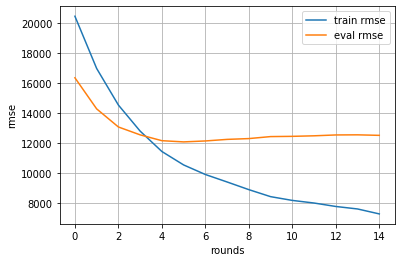

In [34]:
X = df.drop('avg_sale_price_12_month', axis=1)
y = df['avg_sale_price_12_month']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=20)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_val, label=y_val)

xgb_params = {
    # 回帰問題 reg:squarederror
    'objective': 'reg:linear',
    # 学習用の指標 (RMSE)
    'eval_metric': 'rmse',
}
evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}
bst = xgb.train(xgb_params,
                dtrain,
                num_boost_round=1000,
                early_stopping_rounds=10,
                evals=evals,
                evals_result=evals_result,
                )

y_pred = bst.predict(dtest)
mse = mean_squared_error(y_val, y_pred)
print('RMSE:', math.sqrt(mse))

train_metric = evals_result['train']['rmse']
plt.plot(train_metric, label='train rmse')
eval_metric = evals_result['eval']['rmse']
plt.plot(eval_metric, label='eval rmse')
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('rmse')
plt.show()

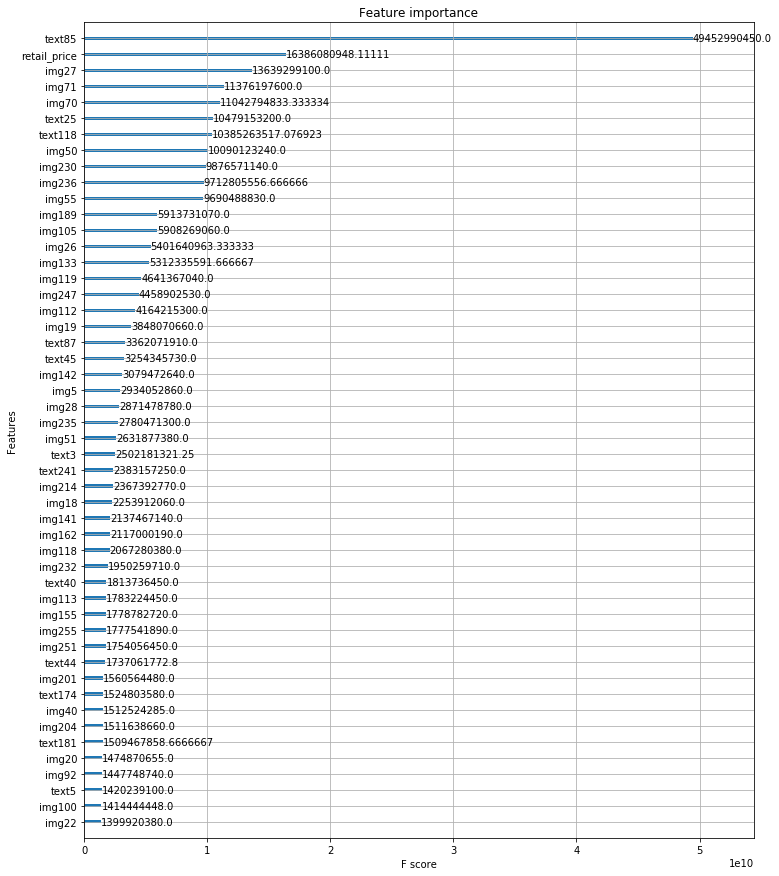

In [42]:
_, ax = plt.subplots(figsize=(12, 15))
xgb.plot_importance(bst, ax=ax, max_num_features=50, importance_type='gain')

In [36]:
dtest = xgb.DMatrix(X_test, label=y_test)

y_pred = bst.predict(dtest)
mse = mean_squared_error(y_test, y_pred)
print('RMSE:', math.sqrt(mse))



RMSE: 12772.882421760549


(5000, 125000)

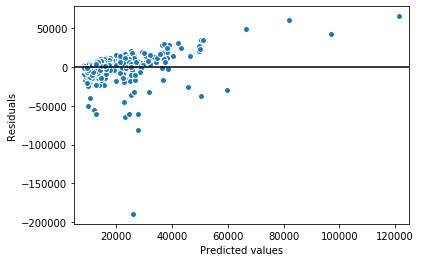

In [37]:
plt.scatter(y_pred, y_pred - y_test, edgecolor='white')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=5000, xmax=125000)
plt.xlim([5000, 125000])

(5000, 125000)

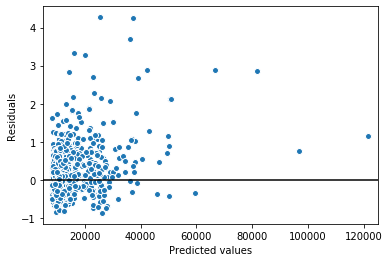

In [43]:
plt.scatter(y_pred, (y_pred - y_test)/y_test, edgecolor='white')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=5000, xmax=125000)
plt.xlim([5000, 125000])